<h1>THÊM THƯ VIỆN</h1>
pip install pmdarima -- Cài đặt thư viện

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

<h1>NẠP DỮ LIỆU</h1>

In [2]:
data = pd.read_csv("../../dataset/KEY.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,5.66,5.97,5.65,5.94,4.080131,14901600
1,2010-01-05,5.88,6.19,5.88,6.17,4.238116,16660800
2,2010-01-06,6.17,6.20,6.06,6.13,4.210639,11785800
3,2010-01-07,6.07,6.48,6.04,6.39,4.389231,25554700
4,2010-01-08,6.35,6.56,6.34,6.50,4.464789,16513200
...,...,...,...,...,...,...,...
3370,2023-05-24,10.30,10.45,10.16,10.20,9.993175,12475800
3371,2023-05-25,10.18,10.23,9.90,10.11,9.905000,15997600
3372,2023-05-26,9.87,10.02,9.76,9.89,9.890000,14311000
3373,2023-05-30,9.97,10.09,9.69,9.93,9.930000,20027100


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3375 entries, 0 to 3374
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3375 non-null   object 
 1   Open       3375 non-null   float64
 2   High       3375 non-null   float64
 3   Low        3375 non-null   float64
 4   Close      3375 non-null   float64
 5   Adj Close  3375 non-null   float64
 6   Volume     3375 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 184.7+ KB


In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3375 entries, 0 to 3374
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3375 non-null   datetime64[ns]
 1   Open       3375 non-null   float64       
 2   High       3375 non-null   float64       
 3   Low        3375 non-null   float64       
 4   Close      3375 non-null   float64       
 5   Adj Close  3375 non-null   float64       
 6   Volume     3375 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 184.7 KB


In [5]:
for i in range(len(data["Date"])):
      data["Date"][i]= data["Date"][i].strftime('%Y-%m-%d')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,5.66,5.97,5.65,5.94,4.080131,14901600
1,2010-01-05,5.88,6.19,5.88,6.17,4.238116,16660800
2,2010-01-06,6.17,6.20,6.06,6.13,4.210639,11785800
3,2010-01-07,6.07,6.48,6.04,6.39,4.389231,25554700
4,2010-01-08,6.35,6.56,6.34,6.50,4.464789,16513200
...,...,...,...,...,...,...,...
3370,2023-05-24,10.30,10.45,10.16,10.20,9.993175,12475800
3371,2023-05-25,10.18,10.23,9.90,10.11,9.905000,15997600
3372,2023-05-26,9.87,10.02,9.76,9.89,9.890000,14311000
3373,2023-05-30,9.97,10.09,9.69,9.93,9.930000,20027100


In [6]:
data.set_index('Date',inplace=True)

In [7]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3375.000000,3375.000000,3375.000000,3375.000000,3375.000000,3.375000e+03
mean,14.283369,14.459236,14.099241,14.278945,11.620319,1.204228e+07
std,4.812581,4.851655,4.769630,4.808535,4.818516,6.750921e+06
min,5.600000,5.860000,5.590000,5.710000,3.980841,1.957500e+06
25%,9.920000,10.030000,9.735000,9.885000,7.412387,8.108850e+06
50%,13.660000,13.790000,13.550000,13.640000,10.530913,1.058320e+07
75%,18.299999,18.490000,18.095000,18.290001,15.324330,1.405810e+07
max,27.150000,27.170000,26.629999,27.010000,25.164295,1.111975e+08


<h1>DATA ANALYSIS</h1>

In [8]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = data.index, y = data.High,
                    mode='lines',
                    name='High',
                    marker_color = '#2CA02C',
                    visible = "legendonly"))
fig.add_trace(go.Scatter(x = data.index, y = data.Low,
                    mode='lines',
                    name='Low',
                    marker_color = '#D62728',
                    visible = "legendonly"))
fig.add_trace(go.Scatter(x = data.index, y = data.Open,
                    mode='lines',
                    name='Open',
                    marker_color = '#FF7F0E',
                    visible = "legendonly"))
fig.add_trace(go.Scatter(x = data.index, y = data.Close,
                    mode='lines',
                    name='Close',
                    marker_color = '#1F77B4'))

fig.update_layout(
    title='Microsoft history',
    titlefont_size = 28,
    
    xaxis = dict(
        title='Date',
        tickmode="array",
        tickvals=[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
        ticktext=[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
        titlefont_size=16,
        tickfont_size=14),
    
    height = 800,
    
    yaxis=dict(
        title='Prices',
        titlefont_size=16,
        tickfont_size=14),
    
    legend=dict(
        y=0,
        x=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'))

fig.show()

<Axes: title={'center': 'Biến động giá cổ phiếu'}, xlabel='Dates', ylabel='Dollars'>

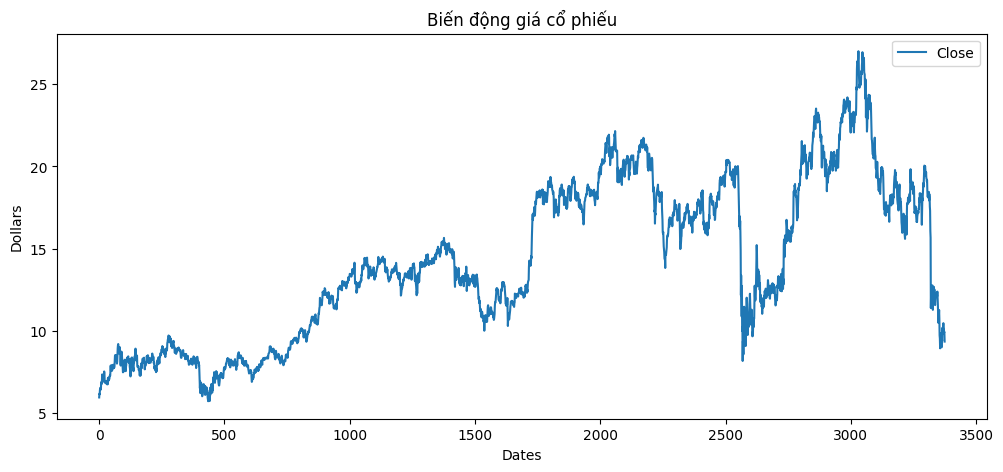

In [9]:
df = data[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

title ='Biến động giá cổ phiếu'
ylabel='Dollars'
xlabel='Dates'
df.plot(figsize=(12,5),title=title,xlabel=xlabel, ylabel=ylabel)

In [10]:
# 2. chia train test validate theo tỉ lệ 7:1:2
# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

<h1>XÂY DỰNG MÔ HÌNH ARIMA</h1>
<h3>Dựa vào chỉ số AIC</h3>
Chỉ số AIC càng thấp thì mô hình càng phù hợp

In [11]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Sử dụng hàm auto_arima để tìm kiếm mo hình ARIMA tốt nhất
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-767.665, Time=1.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-769.132, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-769.064, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-769.120, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-768.397, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-769.619, Time=0.28 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-767.638, Time=1.43 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-767.637, Time=0.82 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-767.542, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-767.443, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-768.213, Time=0.16 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 5.268 seconds


ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True)

In [12]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

In [13]:
# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [14]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[20.83683999 20.85087741 20.86293798 20.87360414 20.88328674 20.89227555
 20.900775   20.90892926 20.91684003 20.92457906 20.93219695 20.93972939
 20.94720155 20.9546312  20.96203085 20.96940936 20.97677294 20.984126
 20.99147164 20.99881203 21.00614874 21.01348284 21.0208151  21.02814607
 21.03547612 21.04280552 21.05013447 21.0574631  21.06479151 21.07211975]


In [15]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
mae = np.mean(np.abs(y_pred - y_test))
mape = np.mean(np.abs((y_pred - y_test) / y_test)) * 100
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('MAE:', mae)
print('MAPE:', mape)

Validation RMSE: 6.210734019040833
Testing RMSE: 7.567860121203256
MAE: 6.175058852233166
MAPE: 43.55819623713307


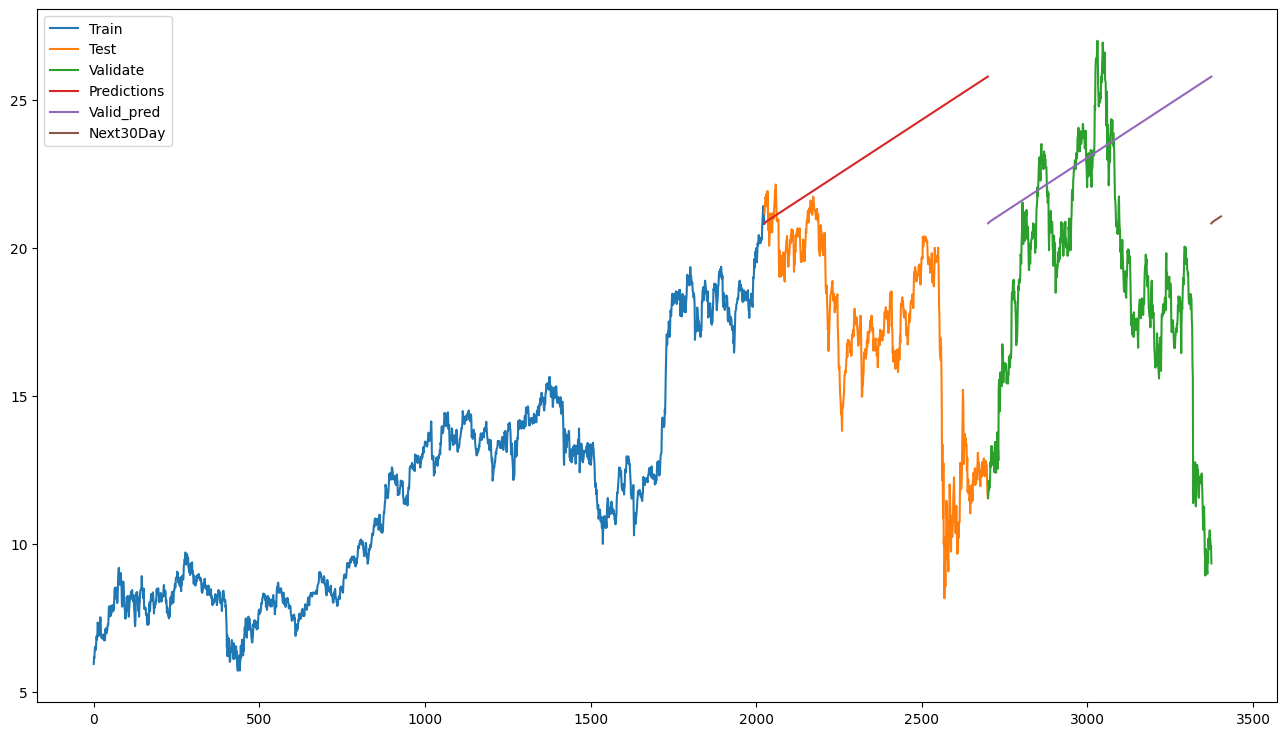

In [16]:
# 8.Vẽ hình
plt.figure(figsize=(16,9))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Validate', 'Predictions','Valid_pred','Next30Day'])
plt.show()

In [17]:
test_data.index

RangeIndex(start=2025, stop=2700, step=1)